# Anomaly Detection Project

In [1]:
from prepare import wrangle_curriculum

import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
pd.plotting.register_matplotlib_converters()
import seaborn as sns

In [2]:
df = wrangle_curriculum()

In [3]:
df

page_viewed user_id cohort_id  \
0                                         /       1         8   
1                                   java-ii       1         8   
2       java-ii/object-oriented-programming       1         8   
3        slides/object_oriented_programming       1         8   
4                 javascript-i/conditionals       2        22   
...                                     ...     ...       ...   
719454          javascript-i/coffee-project     763        62   
719455              javascript-i/mapbox-api     771        62   
719456          javascript-i/coffee-project     771        62   
719457         javascript-i/bom-and-dom/bom     771        62   
719458         javascript-i/bom-and-dom/bom     763        62   

                     ip             datetime  year month day hour weekday  
0          97.105.19.61  2018-01-26 09:55:03  2018     1  26    9  Friday  
1          97.105.19.61  2018-01-26 09:56:02  2018     1  26    9  Friday  
2          97.105.19.61  2018-01-26 09:56:05  2018     1  26    9  Friday  
3          97.105.19.61  2018-01-26 09:56:06  2018     1  26    9  Friday  
4          97.105.19.61  2018-01-26 09:56:24  2018     1  26    9  Friday  
...                 ...                  ...   ...   ...  ..  ...     ...  
719454  107.192.148.199  2020-11-02 16:48:13  2020    11   2   16  Monday  
719455  172.125.226.175  2020-11-02 16:48:17  2020    11   2   16  Monday  
719456  172.125.226.175  2020-11-02 16:48:18  2020    11   2   16  Monday  
719457  172.125.226.175  2020-11-02 16:48:28  2020    11   2   16  Monday  
719458  107.192.148.199  2020-11-02 16:48:47  2020    11   2   16  Monday  

[719459 rows x 10 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719459 entries, 0 to 719458
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   page_viewed  719458 non-null  object
 1   user_id      719459 non-null  object
 2   cohort_id    674619 non-null  object
 3   ip           719459 non-null  object
 4   datetime     719459 non-null  object
 5   year         719459 non-null  object
 6   month        719459 non-null  object
 7   day          719459 non-null  object
 8   hour         719459 non-null  object
 9   weekday      719459 non-null  object
dtypes: object(10)
memory usage: 54.9+ MB


### Splitting off Nan values in cohort_id

In [7]:
cohort_0 = df[df.cohort_id.isnull()]

In [25]:
cohort_0.user_id.unique()

array([48, 54, 58, 59, 61, 62, 63, 73, 74, 78, 79, 86, 88, 89, 100, 103,
       111, 137, 166, 176, 213, 247, 317, 349, 350, 351, 352, 353, 354,
       355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367,
       368, 369, 372, 375, 403, 406, 429, 544, 64, 713, 714, 715, 716,
       717, 718, 663, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728,
       729, 346, 731, 736, 644, 744, 782], dtype=object)

In [49]:
cohort_0[cohort_0.user_id == 729]

page_viewed user_id cohort_id  \
606876  html-css/css-i/flexbox/flexbox-in-practice     729       NaN   
606877         html-css/css-i/flexbox-fundamentals     729       NaN   
606878                                    html-css     729       NaN   
606880                                         toc     729       NaN   
606882                           html-css/elements     729       NaN   
...                                            ...     ...       ...   
668143         examples/javascript/ajax-store.html     729       NaN   
668145          examples/javascript/inventory.json     729       NaN   
668154                     jquery/ajax/weather-map     729       NaN   
669392                               javascript-ii     729       NaN   
669393                           javascript-ii/es6     729       NaN   

                  ip             datetime  year month day hour  weekday  
606876  70.120.16.42  2020-07-21 10:19:42  2020     7  21   10  Tuesday  
606877  70.120.16.42  2020-07-21 10:19:47  2020     7  21   10  Tuesday  
606878  70.120.16.42  2020-07-21 10:19:52  2020     7  21   10  Tuesday  
606880  70.120.16.42  2020-07-21 10:20:09  2020     7  21   10  Tuesday  
606882  70.120.16.42  2020-07-21 10:20:14  2020     7  21   10  Tuesday  
...              ...                  ...   ...   ...  ..  ...      ...  
668143   70.120.8.59  2020-09-11 15:42:17  2020     9  11   15   Friday  
668145   70.120.8.59  2020-09-11 15:42:33  2020     9  11   15   Friday  
668154   70.120.8.59  2020-09-11 15:45:36  2020     9  11   15   Friday  
669392   70.120.8.59  2020-09-14 08:08:50  2020     9  14    8   Monday  
669393   70.120.8.59  2020-09-14 08:09:04  2020     9  14    8   Monday  

[461 rows x 10 columns]

In [10]:
df = df[~df.cohort_id.isnull()]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674619 entries, 0 to 719458
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   page_viewed  674618 non-null  object
 1   user_id      674619 non-null  object
 2   cohort_id    674619 non-null  object
 3   ip           674619 non-null  object
 4   datetime     674619 non-null  object
 5   year         674619 non-null  object
 6   month        674619 non-null  object
 7   day          674619 non-null  object
 8   hour         674619 non-null  object
 9   weekday      674619 non-null  object
dtypes: object(10)
memory usage: 56.6+ MB


In [12]:
cohort = pd.read_csv('cohorts.csv')

In [13]:
cohort

cohort_id        name  start_date    end_date  program_id
0           1      Arches  2014-02-04  2014-04-22           1
1           2    Badlands  2014-06-04  2014-08-22           1
2           3    Carlsbad  2014-09-04  2014-11-05           1
3           4      Denali  2014-10-20  2015-01-18           1
4           5  Everglades  2014-11-18  2015-02-24           1
5           6    Franklin  2015-02-03  2015-05-26           1
6           7     Glacier  2015-06-05  2015-10-06           1
7           8     Hampton  2015-09-22  2016-02-06           1
8           9      Apollo  2015-03-30  2015-07-29           4
9          10      Balboa  2015-11-03  2016-03-11           4
10         11         Ike  2016-01-20  2016-05-12           1
11         12      Joshua  2016-03-08  2016-06-30           1
12         13       Kings  2016-05-23  2016-09-15           1
13         14      Lassen  2016-07-18  2016-11-10           1
14         15     Mammoth  2016-09-26  2017-02-02           2
15         16     Niagara  2016-10-26  2017-03-09           2
16         17     Olympic  2017-02-06  2017-05-25           1
17         18   Pinnacles  2017-03-27  2017-07-20           2
18         19      Quincy  2017-06-05  2017-09-22           1
19         20     Redwood  2017-07-31  2017-12-06           2
20         21     Sequoia  2017-09-27  2018-02-15           2
21         22       Teddy  2018-01-08  2018-05-17           2
22         23     Ulysses  2018-03-05  2018-07-19           2
23         24   Voyageurs  2018-05-29  2018-10-11           2
24         25    Wrangell  2018-07-23  2018-11-29           2
25         26      Xanadu  2018-09-17  2019-02-08           2
26         27    Yosemite  2018-11-05  2019-04-03           2
27         28       Staff  2014-02-04  2014-02-04           2
28         29        Zion  2019-01-22  2019-06-04           2
29         30         Ada  2019-02-04  2019-06-16           3
30         31   Andromeda  2019-03-18  2019-07-30           2
31         32  Betelgeuse  2019-05-28  2019-10-08           2
32         33       Ceres  2019-07-15  2019-12-11           2
33         34       Bayes  2019-08-19  2020-01-30           3
34         51      Deimos  2019-09-16  2020-02-27           2
35         52      Europa  2019-11-04  2020-04-17           2
36         53     Fortuna  2020-01-13  2020-06-23           2
37         55       Curie  2020-02-03  2020-07-07           3
38         56        Apex  2020-02-24  2020-07-29           2
39         57    Ganymede  2020-03-23  2020-08-20           2
40         58    Hyperion  2020-05-26  2020-11-10           2
41         59      Darden  2020-07-13  2021-01-12           3
42         60          Io  2020-07-20  2021-01-21           2
43         61        Bash  2020-07-20  2021-01-21           2
44         62     Jupiter  2020-09-21  2021-03-30           2
45        132     Kalypso  2020-11-02  2021-05-04           2

In [14]:
df = df.merge(cohort, how = 'left', left_on = "cohort_id", right_on = "cohort_id", left_index=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674619 entries, 7 to 44
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   page_viewed  674618 non-null  object
 1   user_id      674619 non-null  object
 2   cohort_id    674619 non-null  object
 3   ip           674619 non-null  object
 4   datetime     674619 non-null  object
 5   year         674619 non-null  object
 6   month        674619 non-null  object
 7   day          674619 non-null  object
 8   hour         674619 non-null  object
 9   weekday      674619 non-null  object
 10  name         674619 non-null  object
 11  start_date   674619 non-null  object
 12  end_date     674619 non-null  object
 13  program_id   674619 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 77.2+ MB


In [16]:
df = df.set_index('datetime')

## Splitting Data into Seperate Cohorts

### Hampton

In [50]:
hampton = df[df.name == 'Hampton']

In [57]:
hampton.head()

page_viewed user_id cohort_id  \
datetime                                                                     
2018-01-26 09:55:03                                    /       1         8   
2018-01-26 09:56:02                              java-ii       1         8   
2018-01-26 09:56:05  java-ii/object-oriented-programming       1         8   
2018-01-26 09:56:06   slides/object_oriented_programming       1         8   
2018-01-26 10:40:15               javascript-i/functions       1         8   

                               ip  year month day hour weekday     name  \
datetime                                                                  
2018-01-26 09:55:03  97.105.19.61  2018     1  26    9  Friday  Hampton   
2018-01-26 09:56:02  97.105.19.61  2018     1  26    9  Friday  Hampton   
2018-01-26 09:56:05  97.105.19.61  2018     1  26    9  Friday  Hampton   
2018-01-26 09:56:06  97.105.19.61  2018     1  26    9  Friday  Hampton   
2018-01-26 10:40:15  97.105.19.61  2018     1  26   10  Friday  Hampton   

                     start_date    end_date  program_id  
datetime                                                 
2018-01-26 09:55:03  2015-09-22  2016-02-06           1  
2018-01-26 09:56:02  2015-09-22  2016-02-06           1  
2018-01-26 09:56:05  2015-09-22  2016-02-06           1  
2018-01-26 09:56:06  2015-09-22  2016-02-06           1  
2018-01-26 10:40:15  2015-09-22  2016-02-06           1

In [67]:
hampton.user_id.value_counts()

1      1617
646      41
150      23
114      18
174      13
Name: user_id, dtype: int64

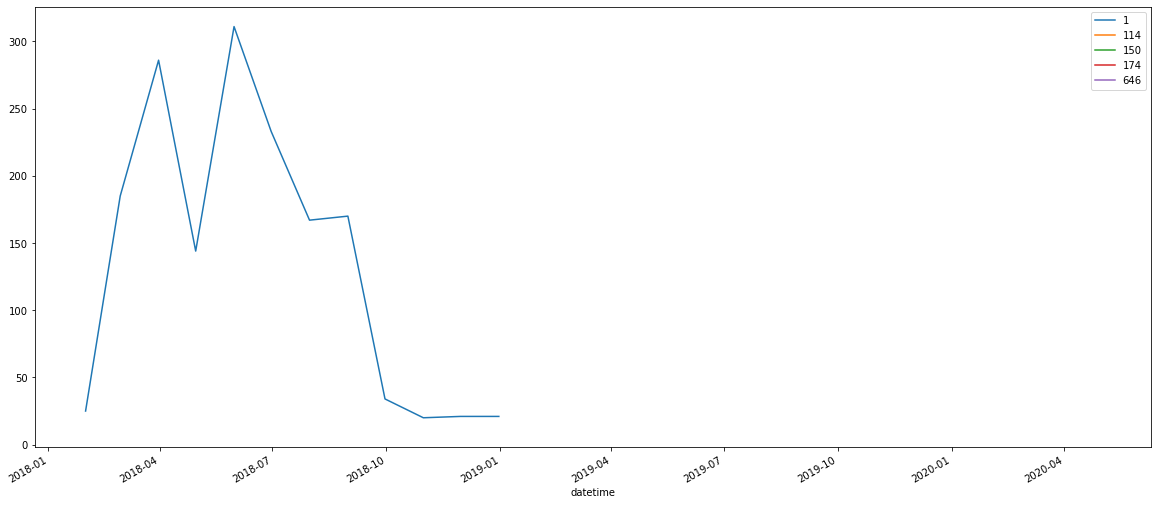

In [83]:
hampton.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (20,9))
plt.legend()
plt.show()

In [78]:
hampton.groupby('user_id').resample('M').page_viewed.count()

user_id  datetime  
1        2018-01-31     25
         2018-02-28    185
         2018-03-31    286
         2018-04-30    144
         2018-05-31    311
         2018-06-30    233
         2018-07-31    167
         2018-08-31    170
         2018-09-30     34
         2018-10-31     20
         2018-11-30     21
         2018-12-31     21
114      2018-03-31     18
150      2018-03-31     23
174      2018-04-30     13
646      2020-04-30     41
Name: page_viewed, dtype: int64

In [85]:
hampton[hampton.user_id == 646]

page_viewed  \
datetime                                                                 
2020-04-09 12:56:24                                                  /   
2020-04-09 15:35:20                                   content/html-css   
2020-04-09 15:35:20        content/html-css/gitbook/images/favicon.ico   
2020-04-09 15:35:35                 content/html-css/introduction.html   
2020-04-09 16:06:28                     content/html-css/elements.html   
2020-04-09 16:10:11                                                  /   
2020-04-09 16:11:11                                                  /   
2020-04-09 16:22:00   content/examples/html/gitbook/images/favicon.ico   
2020-04-09 16:22:25  content/examples/examples/html/gitbook/images/...   
2020-04-09 16:22:33                     content/examples/examples/html   
2020-04-09 16:22:38                     content/examples/examples/html   
2020-04-09 16:23:02                              content/examples/html   
2020-04-09 16:25:35                     content/html-css/elements.html   
2020-04-09 17:07:56                        content/html-css/forms.html   
2020-04-20 21:00:57                                                  /   
2020-04-20 21:01:00                              content/javascript_ii   
2020-04-20 21:01:00   content/javascript_ii/gitbook/images/favicon.ico   
2020-04-20 21:01:01                                 content/javascript   
2020-04-20 21:01:01      content/javascript/gitbook/images/favicon.ico   
2020-04-20 21:01:27  content/javascript/introduction-to-javascript....   
2020-04-20 21:04:19            content/javascript/primitive-types.html   
2020-04-21 12:48:23       content/javascript/javascript-with-html.html   
2020-04-21 12:54:09               content/javascript/conditionals.html   
2020-04-23 09:56:03                                                  /   
2020-04-23 09:56:06                                 content/javascript   
2020-04-23 09:56:07      content/javascript/gitbook/images/favicon.ico   
2020-04-23 09:56:11               content/javascript/conditionals.html   
2020-04-23 10:12:44                                 content/javascript   
2020-04-23 10:12:49  content/javascript/introduction-to-javascript....   
2020-04-23 10:13:05            content/javascript/primitive-types.html   
2020-04-23 10:13:09       content/javascript/javascript-with-html.html   
2020-04-23 10:15:22               content/javascript/conditionals.html   
2020-04-23 10:16:04       content/javascript/javascript-with-html.html   
2020-04-23 10:16:23               content/javascript/conditionals.html   
2020-04-23 10:18:01       content/javascript/javascript-with-html.html   
2020-04-23 10:18:06                          content/javascript/arrays   
2020-04-23 10:18:07  content/javascript/arrays/gitbook/images/favic...   
2020-04-23 10:18:47           content/javascript/arrays/iterating.html   
2020-04-23 10:19:24                  content/javascript/functions.html   
2020-04-28 10:58:31                      content/javascript/loops.html   
2020-04-28 10:58:40               content/javascript/conditionals.html   

                    user_id cohort_id               ip  year month day hour  \
datetime                                                                      
2020-04-09 12:56:24     646         8  173.174.197.146  2020     4   9   12   
2020-04-09 15:35:20     646         8  173.174.197.146  2020     4   9   15   
2020-04-09 15:35:20     646         8  173.174.197.146  2020     4   9   15   
2020-04-09 15:35:35     646         8  173.174.197.146  2020     4   9   15   
2020-04-09 16:06:28     646         8  173.174.197.146  2020     4   9   16   
2020-04-09 16:10:11     646         8  173.174.197.146  2020     4   9   16   
2020-04-09 16:11:11     646         8  173.174.197.146  2020     4   9   16   
2020-04-09 16:22:00     646         8  173.174.197.146  2020     4   9   16   
2020-04-09 16:22:25     646         8  173.174.197.146  2020     4   9   16   
2020-04

### Teddy

In [76]:
teddy = df[df.name == 'Teddy']

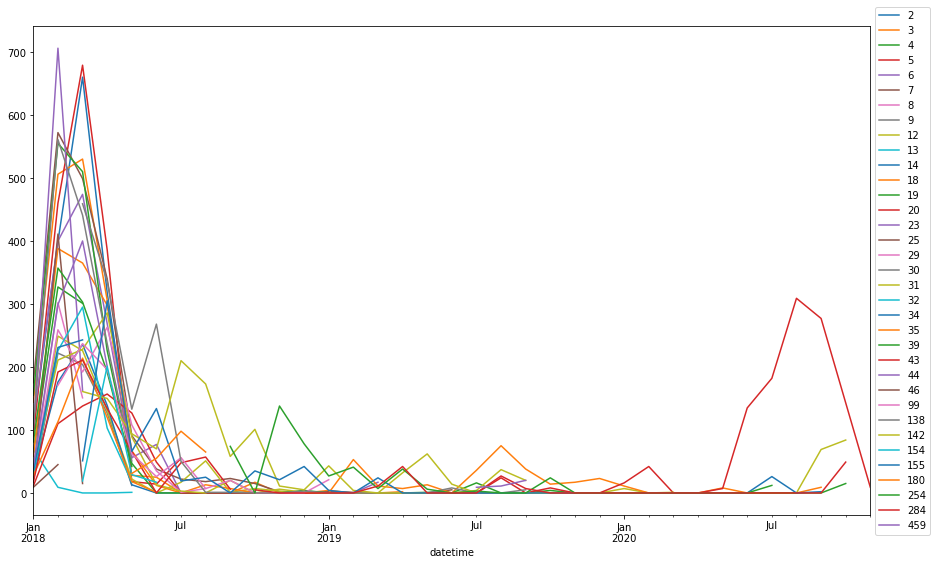

In [88]:
teddy.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [79]:
teddy.groupby('user_id').resample('M').page_viewed.count()

user_id  datetime  
2        2018-01-31    108
         2018-02-28    399
         2018-03-31    660
         2018-04-30    318
         2018-05-31     56
                      ... 
284      2020-09-30      0
         2020-10-31     49
459      2019-07-31      9
         2019-08-31     11
         2019-09-30     20
Name: page_viewed, Length: 443, dtype: int64

### Sequoia

In [95]:
sequoia = df[df.name == 'Sequoia']

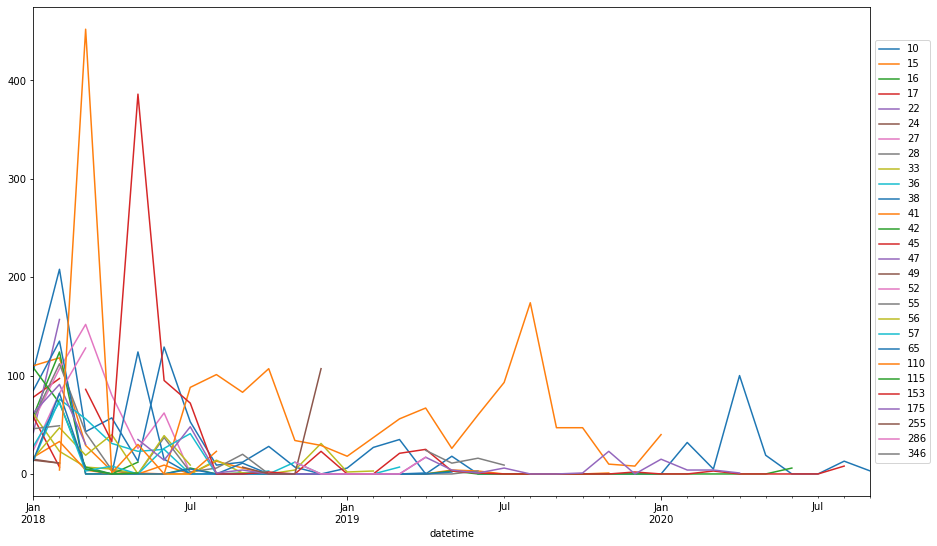

In [96]:
sequoia.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Arches

In [98]:
arches = df[df.name == 'Arches']

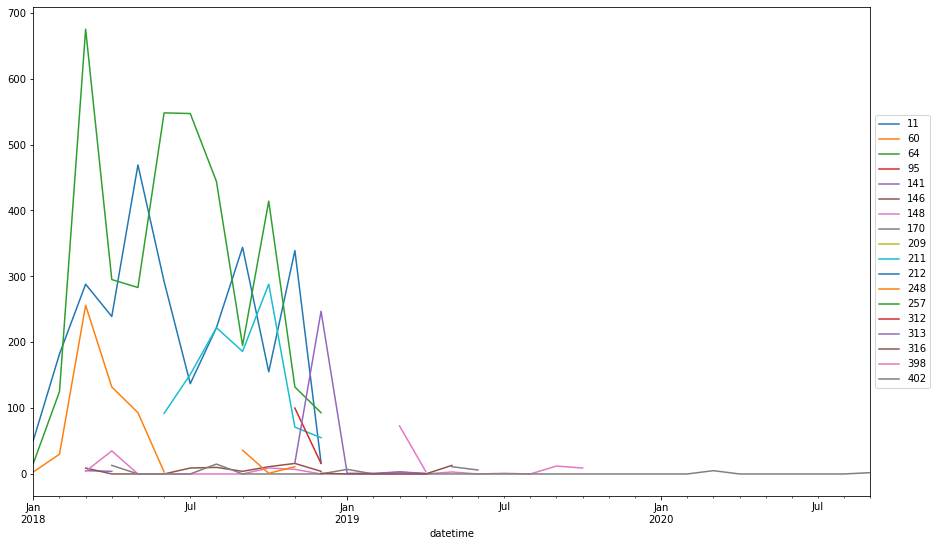

In [99]:
arches.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Niagara

In [100]:
niagara = df[df.name == 'Niagara']

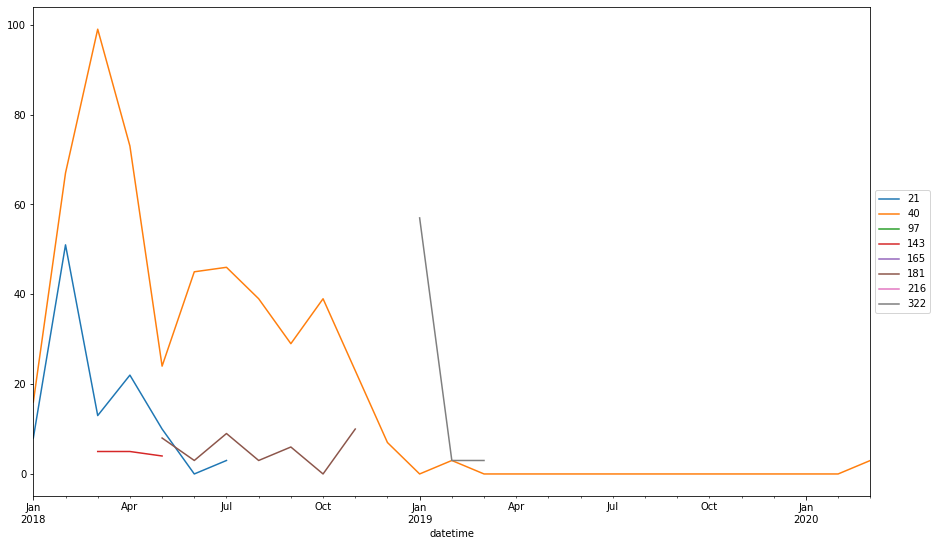

In [101]:
niagara.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Pinnacles

In [102]:
pinnacles = df[df.name == 'Pinnacles']

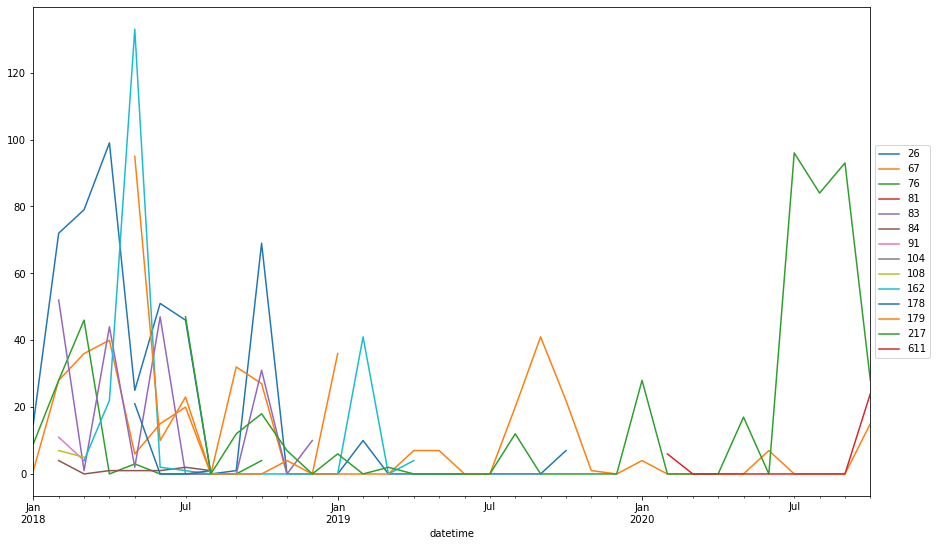

In [103]:
pinnacles.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Quincy

In [104]:
quincy = df[df.name == 'Quincy']

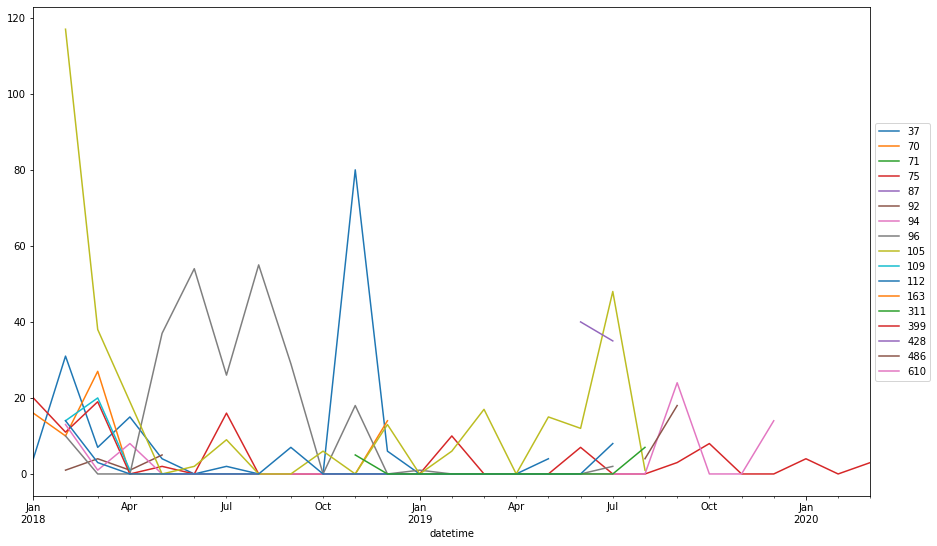

In [105]:
quincy.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Kings

In [106]:
kings = df[df.name == 'Kings']

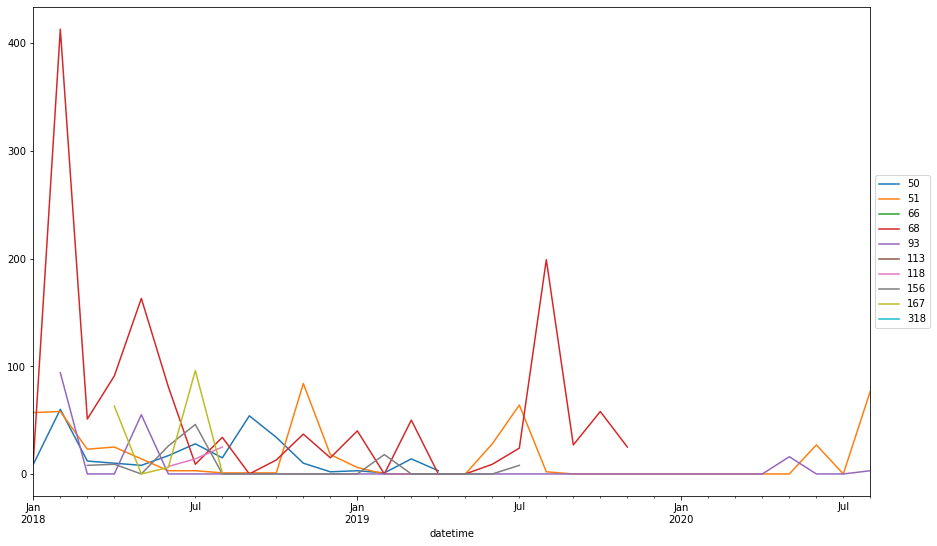

In [107]:
kings.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Lassen

In [108]:
lassen = df[df.name == 'Lassen']

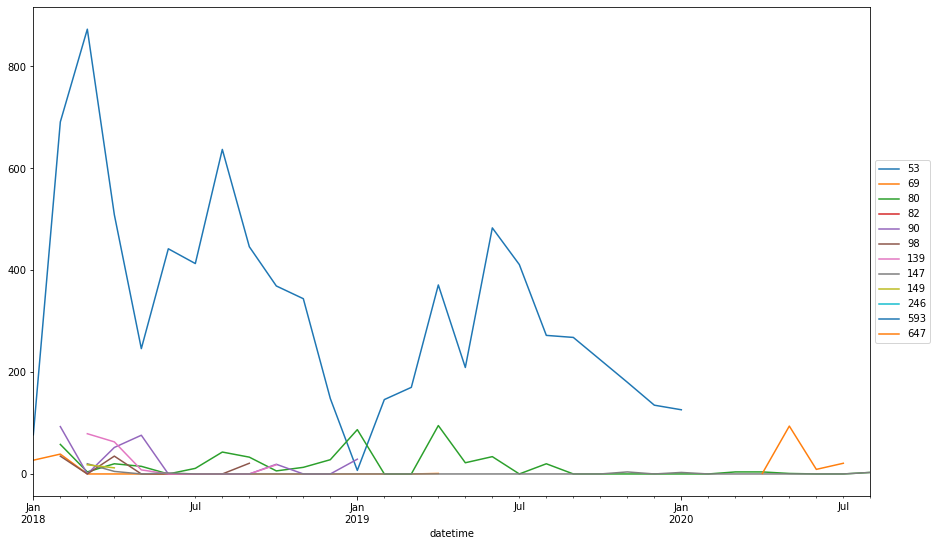

In [109]:
lassen.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Mammoth

In [110]:
mammoth = df[df.name == 'Mammoth']

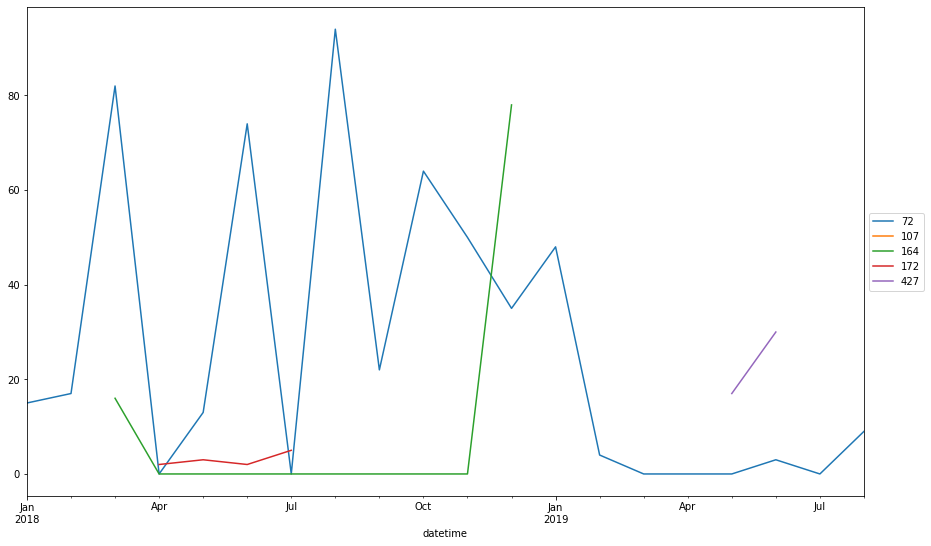

In [111]:
mammoth.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Glacier

In [112]:
glacier = df[df.name == 'Glacier']

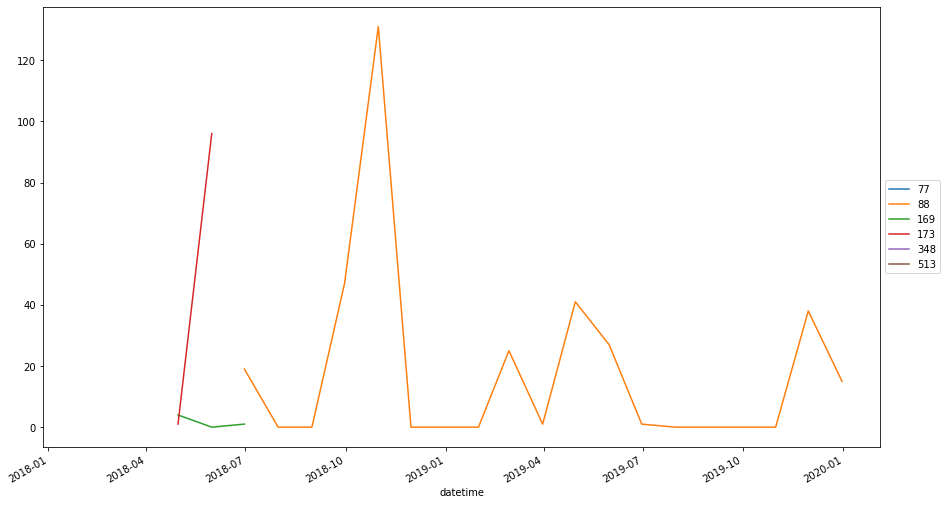

In [113]:
glacier.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Denali

In [114]:
denali = df[df.name == 'Denali']

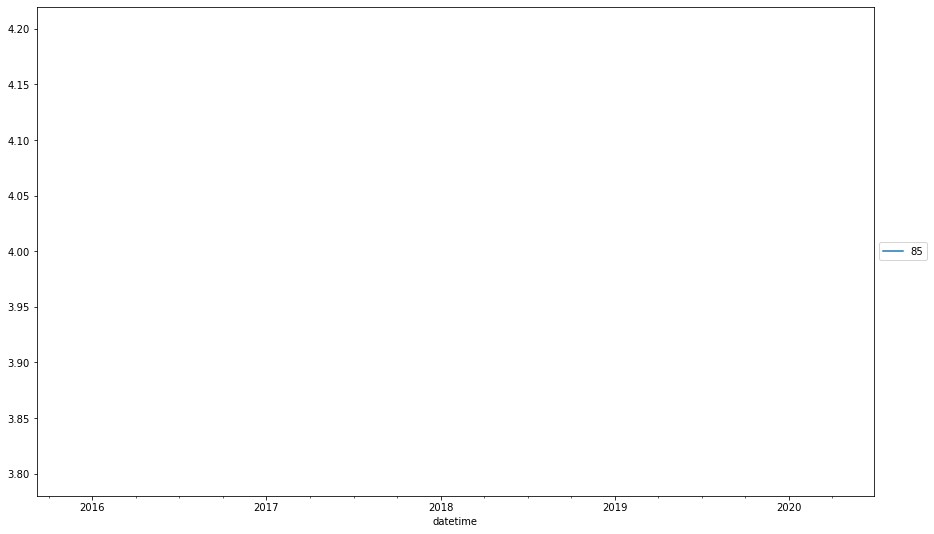

In [116]:
denali.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [117]:
denali

page_viewed user_id cohort_id  \
datetime                                                           
2018-02-04 11:21:38                          /      85         4   
2018-02-04 11:23:27   mkdocs/search_index.json      85         4   
2018-02-04 11:24:05          prework/databases      85         4   
2018-02-04 11:24:56  prework/versioning/github      85         4   

                                ip  year month day hour weekday    name  \
datetime                                                                  
2018-02-04 11:21:38  66.42.139.162  2018     2   4   11  Sunday  Denali   
2018-02-04 11:23:27  66.42.139.162  2018     2   4   11  Sunday  Denali   
2018-02-04 11:24:05  66.42.139.162  2018     2   4   11  Sunday  Denali   
2018-02-04 11:24:56  66.42.139.162  2018     2   4   11  Sunday  Denali   

                     start_date    end_date  program_id  
datetime                                                 
2018-02-04 11:21:38  2014-10-20  2015-01-18           1  
2018-02-04 11:23:27  2014-10-20  2015-01-18           1  
2018-02-04 11:24:05  2014-10-20  2015-01-18           1  
2018-02-04 11:24:56  2014-10-20  2015-01-18           1

### Joshua

In [118]:
joshua = df[df.name == 'Joshua']

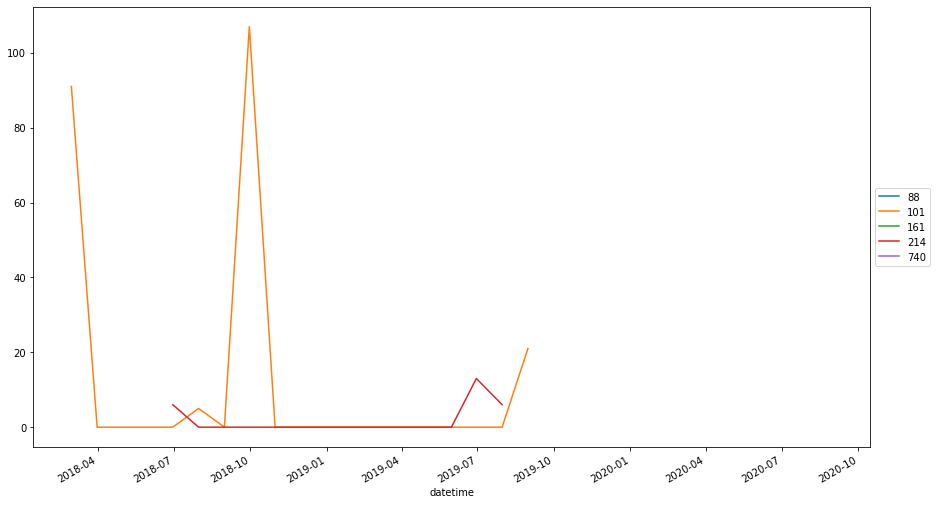

In [119]:
joshua.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Olympic

In [120]:
olympic = df[df.name == 'Olympic']

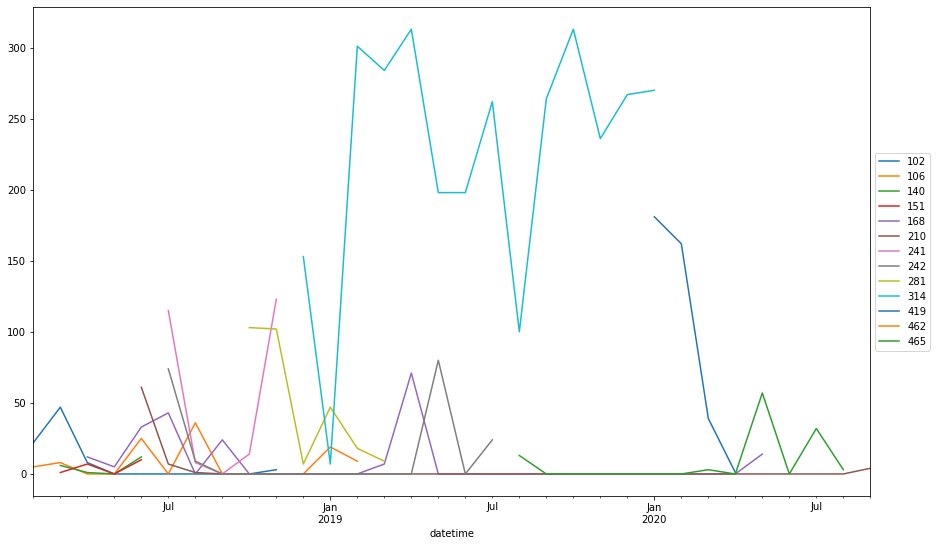

In [121]:
olympic.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Ulysses

In [122]:
ulysses = df[df.name == 'Ulysses']

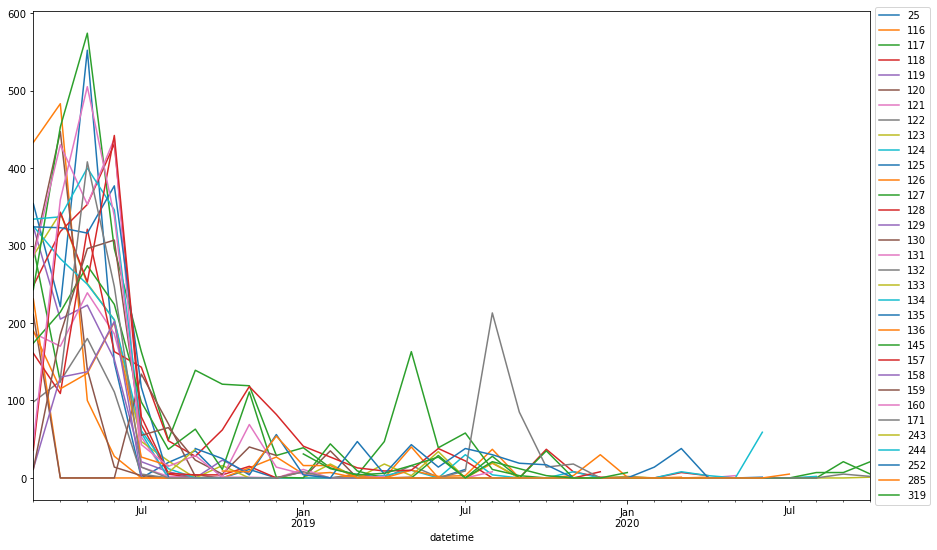

In [123]:
ulysses.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Badlands

In [124]:
badlands = df[df.name == 'Badlands']

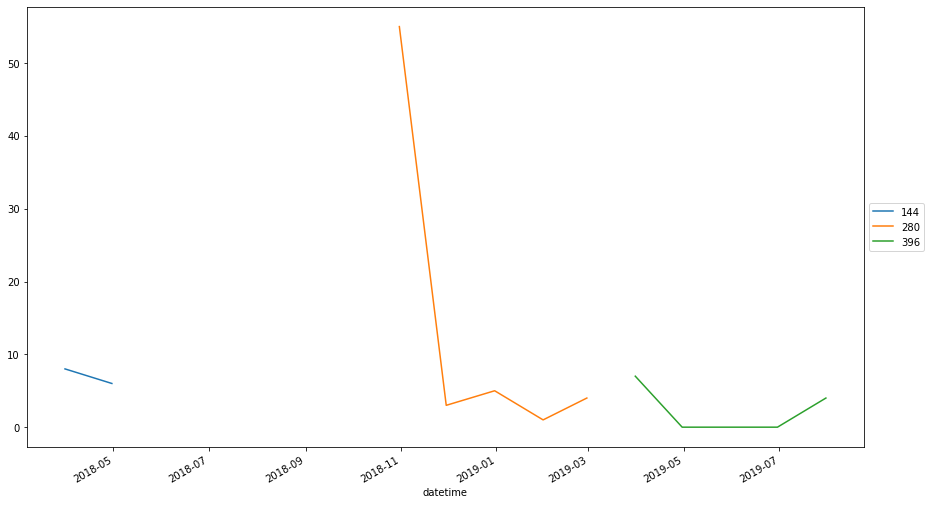

In [125]:
badlands.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [126]:
badlands

page_viewed user_id cohort_id  \
datetime                                                                   
2018-03-19 03:09:52                                  /     144         2   
2018-03-19 03:10:04               prework/fundamentals     144         2   
2018-03-19 03:10:51               prework/fundamentals     144         2   
2018-03-19 03:10:57      prework/fundamentals/variable     144         2   
2018-03-19 03:10:59  prework/fundamentals/if-statement     144         2   
...                                                ...     ...       ...   
2019-03-22 23:37:25             javascript-ii/promises     396         2   
2019-07-31 16:00:52                                  /     396         2   
2019-07-31 16:01:07                           html-css     396         2   
2019-07-31 16:01:13              html-css/introduction     396         2   
2019-07-31 16:01:25                  html-css/elements     396         2   

                                 ip  year month day hour    weekday      name  \
datetime                                                                        
2018-03-19 03:09:52  76.185.175.160  2018     3  19    3     Monday  Badlands   
2018-03-19 03:10:04  76.185.175.160  2018     3  19    3     Monday  Badlands   
2018-03-19 03:10:51  76.185.175.160  2018     3  19    3     Monday  Badlands   
2018-03-19 03:10:57  76.185.175.160  2018     3  19    3     Monday  Badlands   
2018-03-19 03:10:59  76.185.175.160  2018     3  19    3     Monday  Badlands   
...                             ...   ...   ...  ..  ...        ...       ...   
2019-03-22 23:37:25    67.11.97.204  2019     3  22   23     Friday  Badlands   
2019-07-31 16:00:52  174.207.23.110  2019     7  31   16  Wednesday  Badlands   
2019-07-31 16:01:07  174.207.23.110  2019     7  31   16  Wednesday  Badlands   
2019-07-31 16:01:13  174.207.23.110  2019     7  31   16  Wednesday  Badlands   
2019-07-31 16:01:25  174.207.23.110  2019     7  31   16  Wednesday  Badlands   

                     start_date    end_date  program_id  
datetime                                                 
2018-03-19 03:09:52  2014-06-04  2014-08-22           1  
2018-03-19 03:10:04  2014-06-04  2014-08-22           1  
2018-03-19 03:10:51  2014-06-04  2014-08-22           1  
2018-03-19 03:10:57  2014-06-04  2014-08-22           1  
2018-03-19 03:10:59  2014-06-04  2014-08-22           1  
...                         ...         ...         ...  
2019-03-22 23:37:25  2014-06-04  2014-08-22           1  
2019-07-31 16:00:52  2014-06-04  2014-08-22           1  
2019-07-31 16:01:07  2014-06-04  2014-08-22           1  
2019-07-31 16:01:13  2014-06-04  2014-08-22           1  
2019-07-31 16:01:25  2014-06-04  2014-08-22           1  

[93 rows x 13 columns]

### Apollo

In [127]:
apollo = df[df.name == 'Apollo']

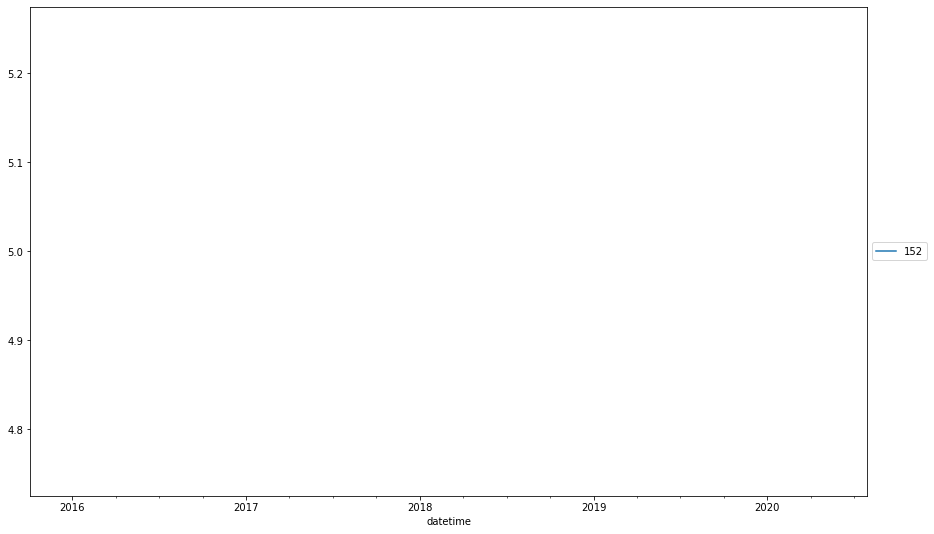

In [128]:
apollo.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [133]:
apollo.groupby('user_id').resample('M').page_viewed.count()

user_id  datetime  
152      2018-03-31    5
Name: page_viewed, dtype: int64

In [134]:
apollo

page_viewed user_id  \
datetime                                                                   
2018-03-22 19:01:49                                            /     152   
2018-03-22 19:01:54                             content/html-css     152   
2018-03-22 19:01:54  content/html-css/gitbook/images/favicon.ico     152   
2018-03-22 19:02:47                             content/html-css     152   
2018-03-22 19:02:52           content/html-css/introduction.html     152   

                    cohort_id             ip  year month day hour   weekday  \
datetime                                                                      
2018-03-22 19:01:49         9  207.68.209.17  2018     3  22   19  Thursday   
2018-03-22 19:01:54         9  207.68.209.17  2018     3  22   19  Thursday   
2018-03-22 19:01:54         9  207.68.209.17  2018     3  22   19  Thursday   
2018-03-22 19:02:47         9  207.68.209.17  2018     3  22   19  Thursday   
2018-03-22 19:02:52         9  207.68.209.17  2018     3  22   19  Thursday   

                       name  start_date    end_date  program_id  
datetime                                                         
2018-03-22 19:01:49  Apollo  2015-03-30  2015-07-29           4  
2018-03-22 19:01:54  Apollo  2015-03-30  2015-07-29           4  
2018-03-22 19:01:54  Apollo  2015-03-30  2015-07-29           4  
2018-03-22 19:02:47  Apollo  2015-03-30  2015-07-29           4  
2018-03-22 19:02:52  Apollo  2015-03-30  2015-07-29           4

### Ike

In [130]:
ike = df[df.name == 'Ike']

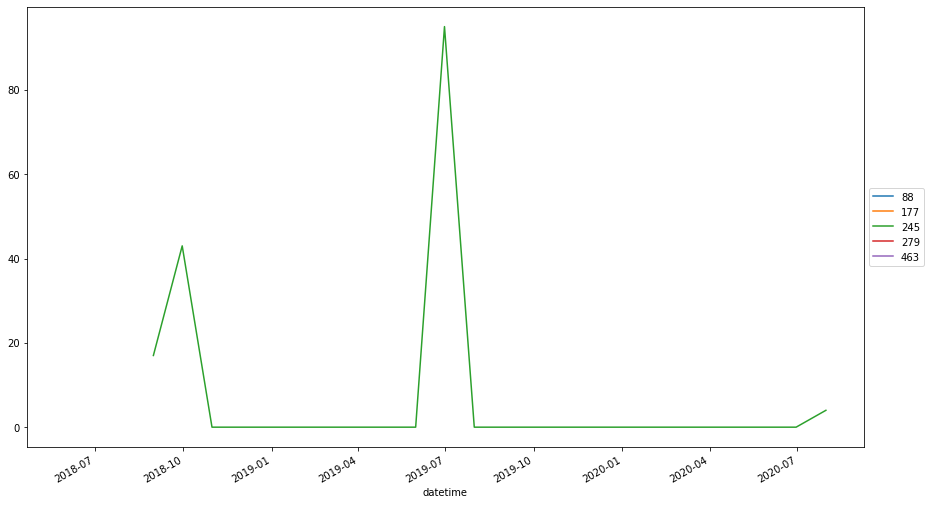

In [131]:
ike.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [135]:
ike.groupby('user_id').resample('M').page_viewed.count()

user_id  datetime  
88       2018-08-31     6
177      2018-05-31     3
245      2018-08-31    17
         2018-09-30    43
         2018-10-31     0
         2018-11-30     0
         2018-12-31     0
         2019-01-31     0
         2019-02-28     0
         2019-03-31     0
         2019-04-30     0
         2019-05-31     0
         2019-06-30    95
         2019-07-31     0
         2019-08-31     0
         2019-09-30     0
         2019-10-31     0
         2019-11-30     0
         2019-12-31     0
         2020-01-31     0
         2020-02-29     0
         2020-03-31     0
         2020-04-30     0
         2020-05-31     0
         2020-06-30     0
         2020-07-31     4
279      2018-10-31    10
463      2019-08-31    30
Name: page_viewed, dtype: int64

### Voyageurs

In [136]:
voyageurs = df[df.name == 'Voyageurs']

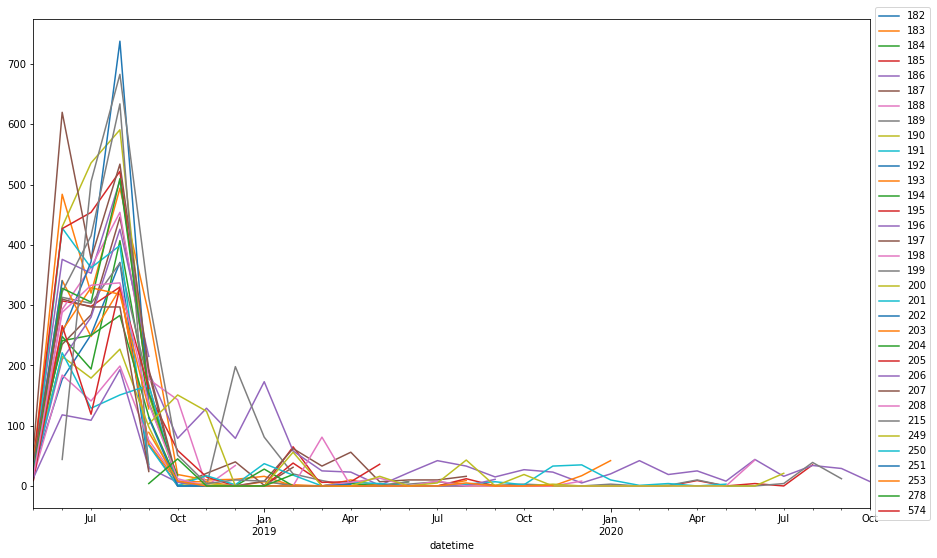

In [137]:
voyageurs.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Wrangell

In [138]:
wrangell = df[df.name == 'Wrangell']

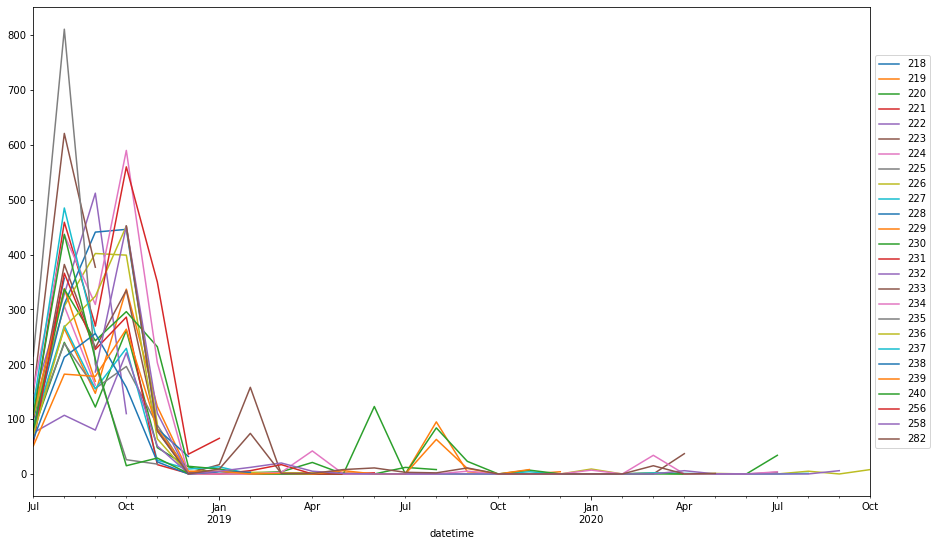

In [139]:
wrangell.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Xanadu

In [140]:
xanadu = df[df.name == 'Xanadu']

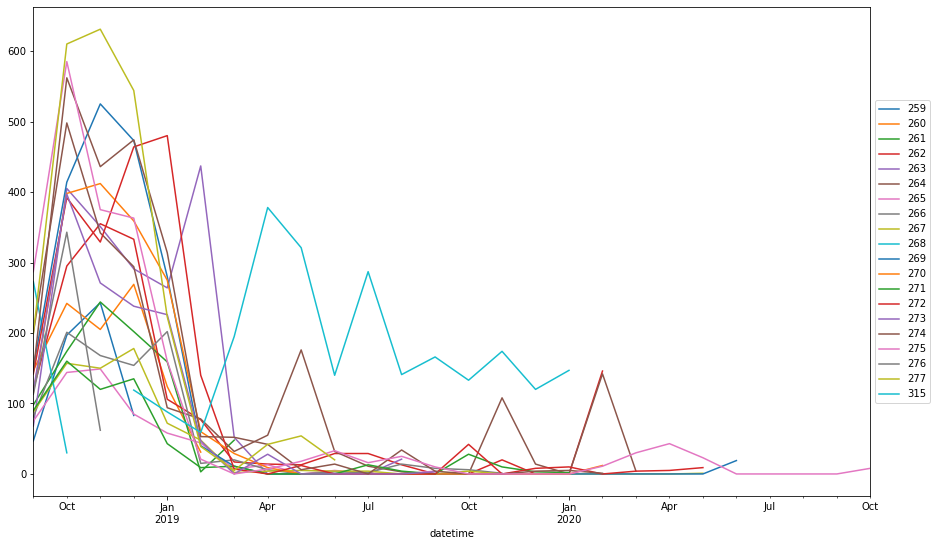

In [141]:
xanadu.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Franklin

In [142]:
franklin = df[df.name == 'Franklin']

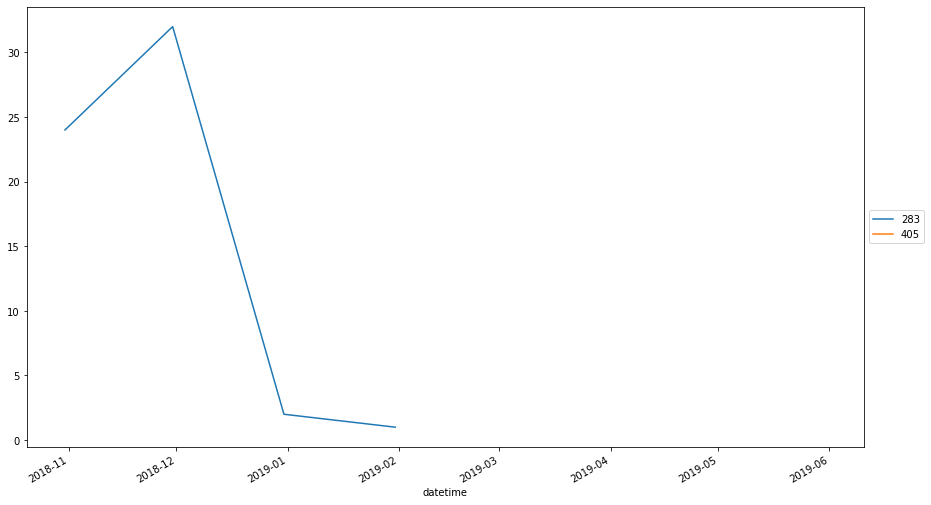

In [143]:
franklin.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [144]:
franklin.groupby('user_id').resample('M').page_viewed.count()

user_id  datetime  
283      2018-10-31    24
         2018-11-30    32
         2018-12-31     2
         2019-01-31     1
405      2019-05-31    13
Name: page_viewed, dtype: int64

### Yosemite

In [145]:
yosemite = df[df.name == 'Yosemite']

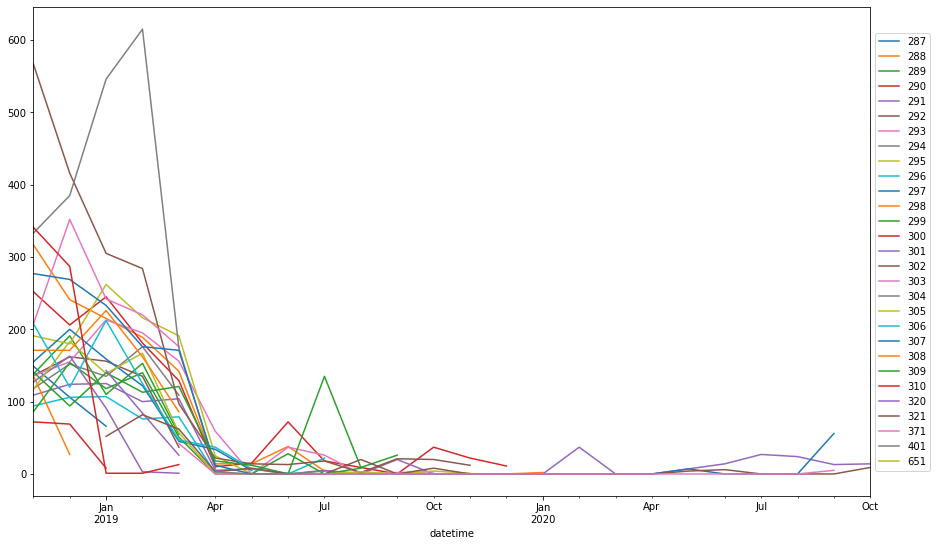

In [146]:
yosemite.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Staff 

In [147]:
staff = df[df.name == 'Staff']

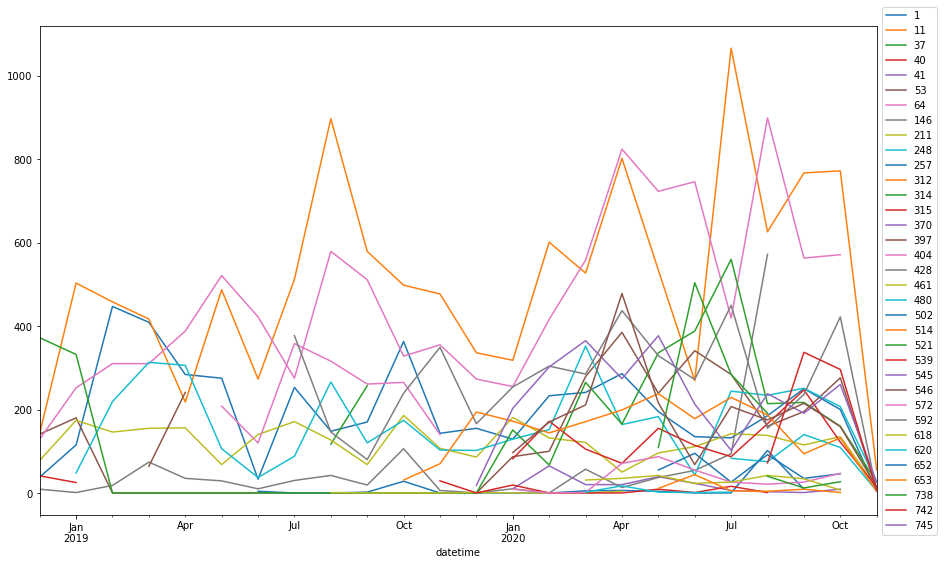

In [148]:
staff.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Zion

In [149]:
zion = df[df.name == 'Zion']

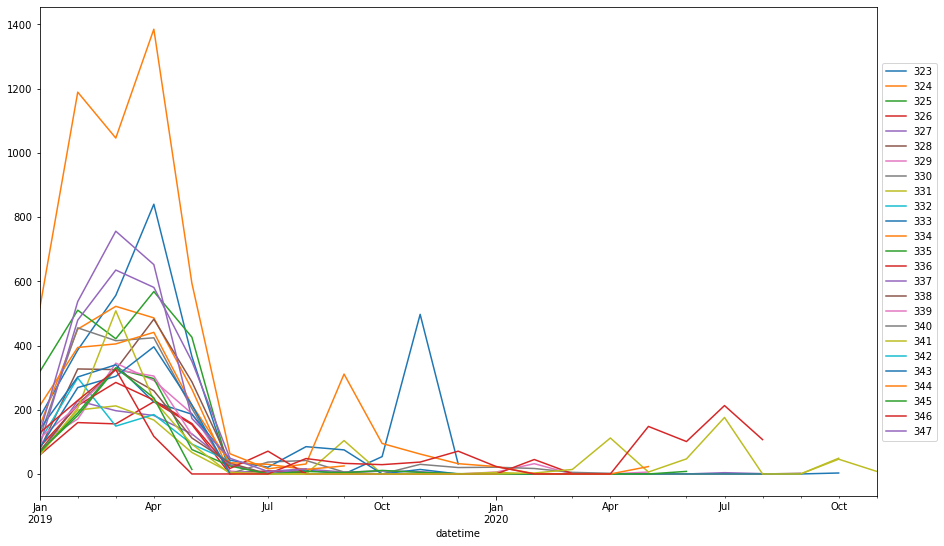

In [150]:
zion.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Andromeda

In [151]:
andromeda = df[df.name == 'Andromeda']

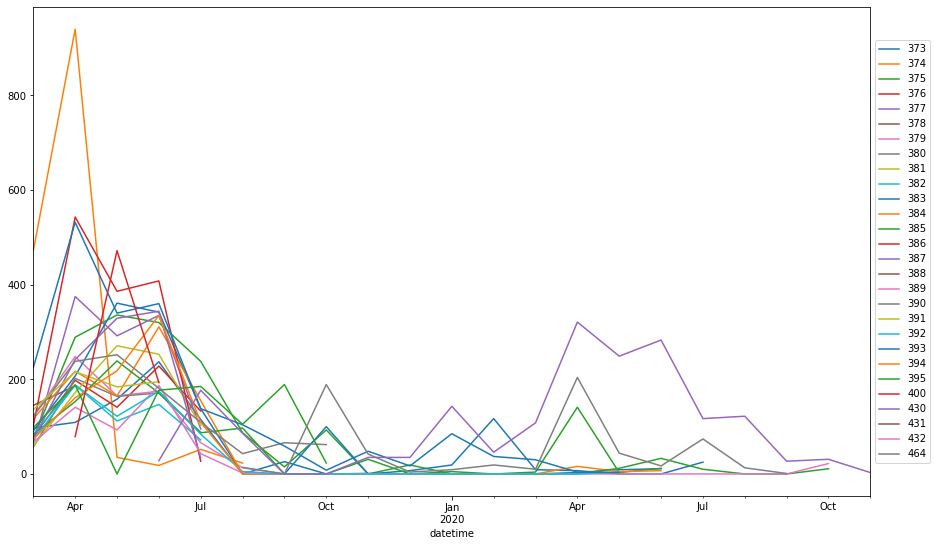

In [152]:
andromeda.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Betelgeuse

In [153]:
betelgeuse = df[df.name == 'Betelgeuse']

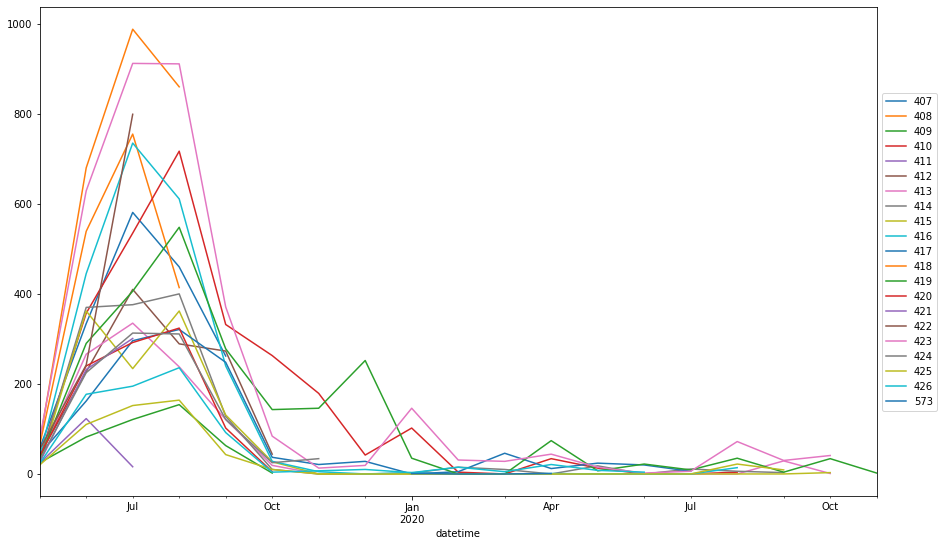

In [155]:
betelgeuse.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Ceres

In [156]:
ceres = df[df.name == 'Ceres']

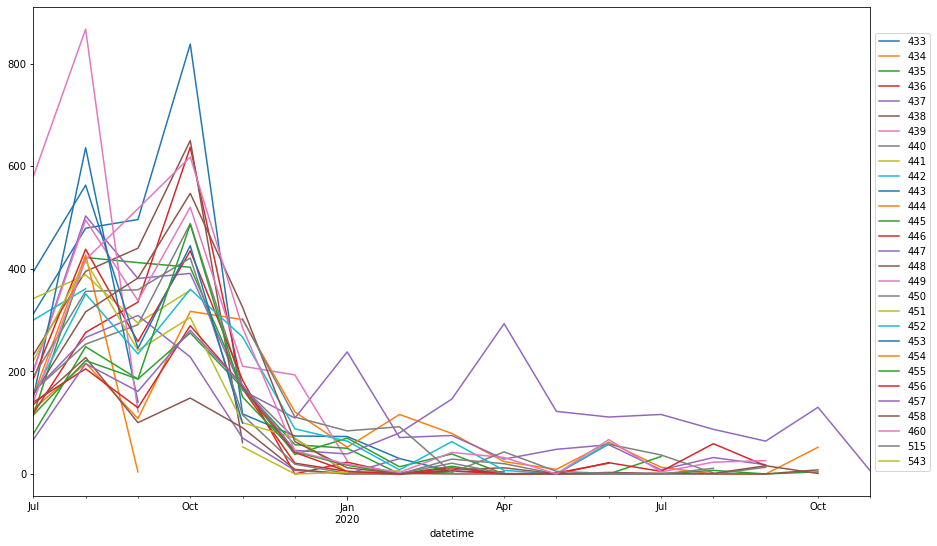

In [157]:
ceres.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Bayes

In [158]:
bayes = df[df.name == 'Bayes']

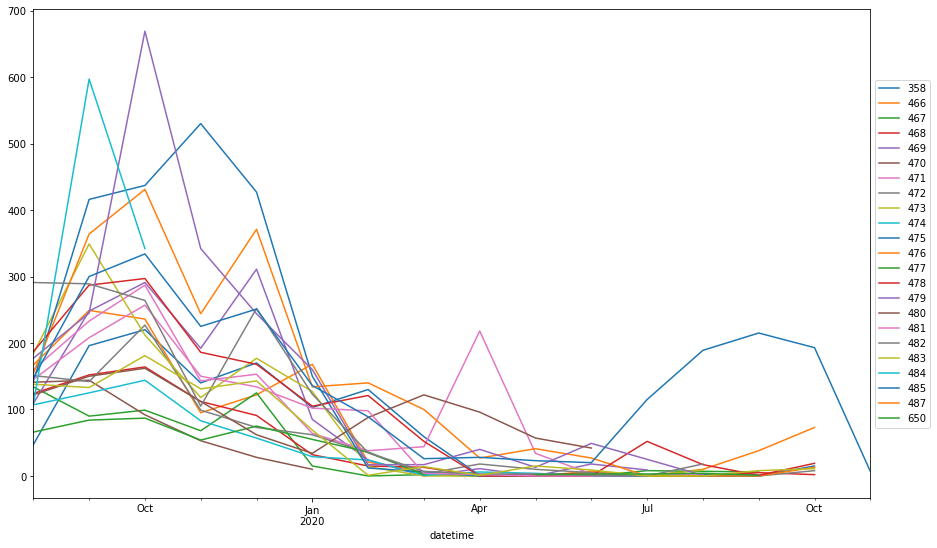

In [159]:
bayes.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Deimos

In [160]:
deimos = df[df.name == 'Deimos']

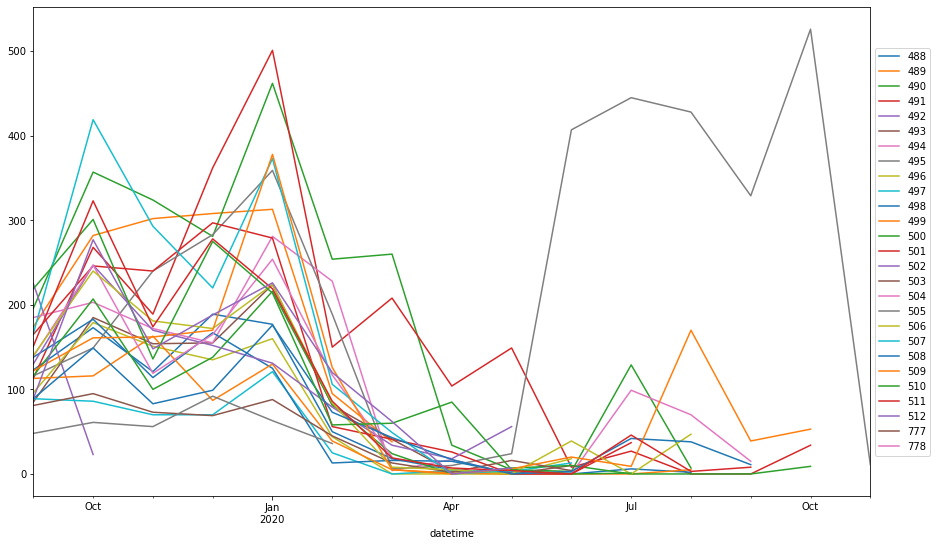

In [161]:
deimos.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Europa

In [162]:
europa = df[df.name == 'Europa']

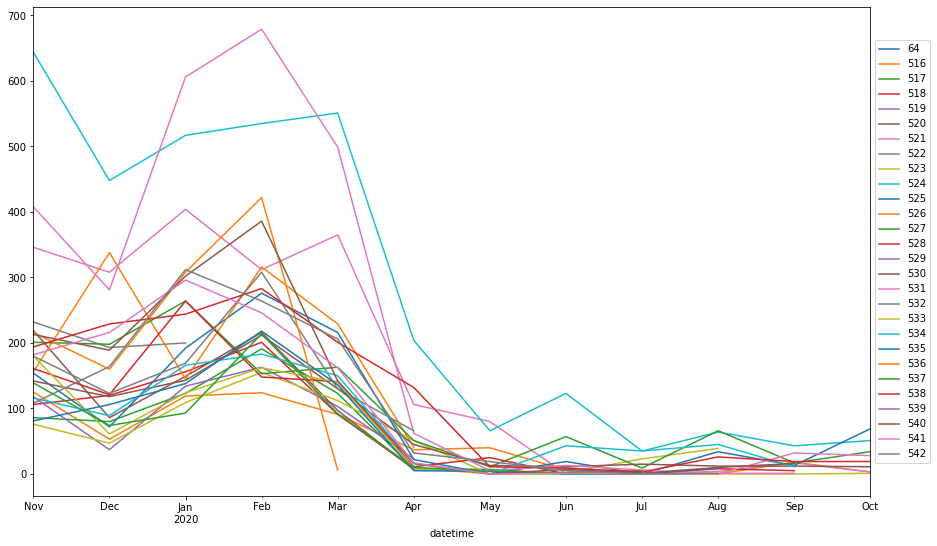

In [163]:
europa.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Fortuna 

In [164]:
fortuna = df[df.name == 'Fortuna']

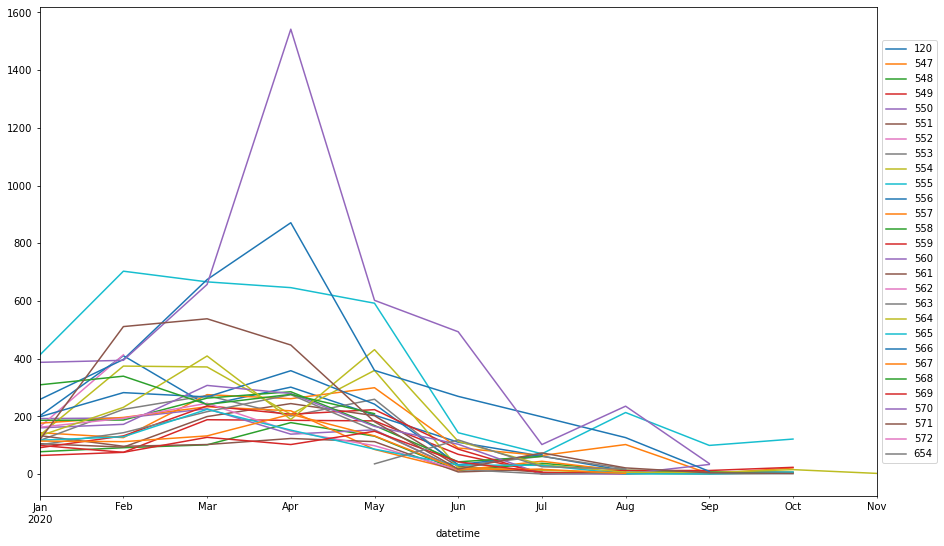

In [165]:
fortuna.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Curie 

In [166]:
curie = df[df.name == 'Curie']

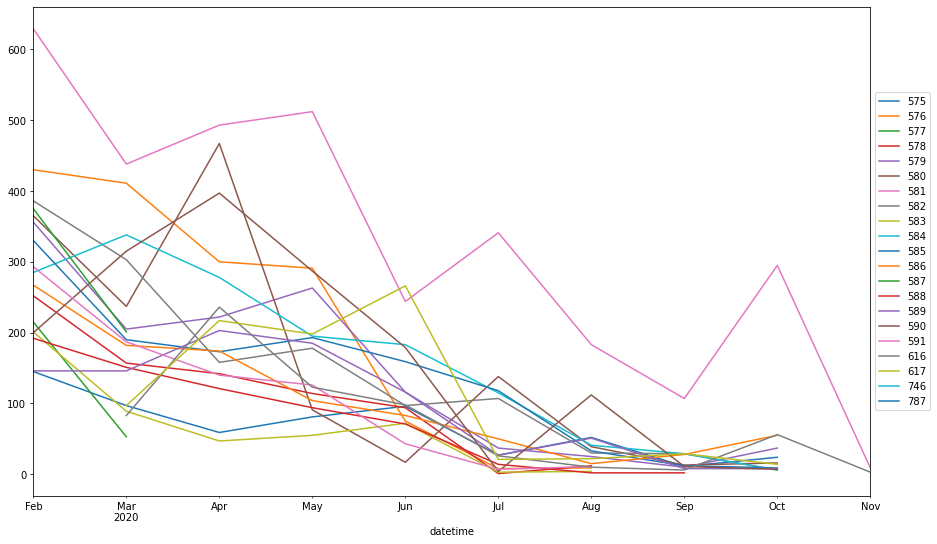

In [167]:
curie.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Apex

In [168]:
apex = df[df.name == 'Apex']

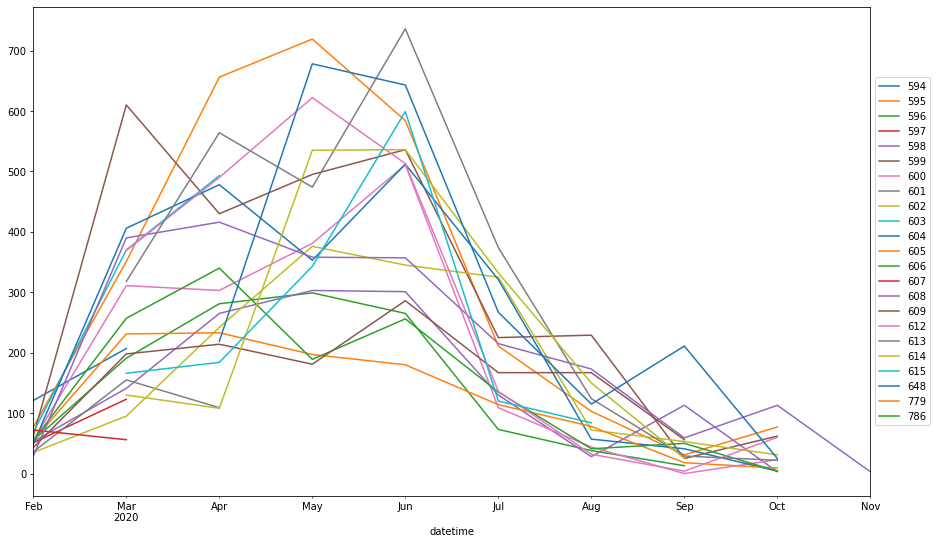

In [169]:
apex.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Ganymede

In [170]:
ganymede = df[df.name == 'Ganymede']

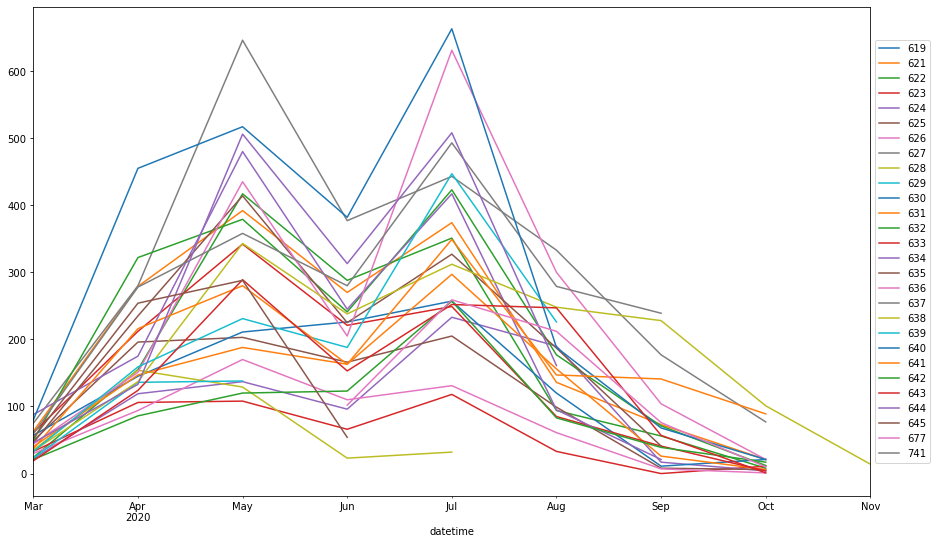

In [171]:
ganymede.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Everglades

In [172]:
everglades = df[df.name == 'Everglades']

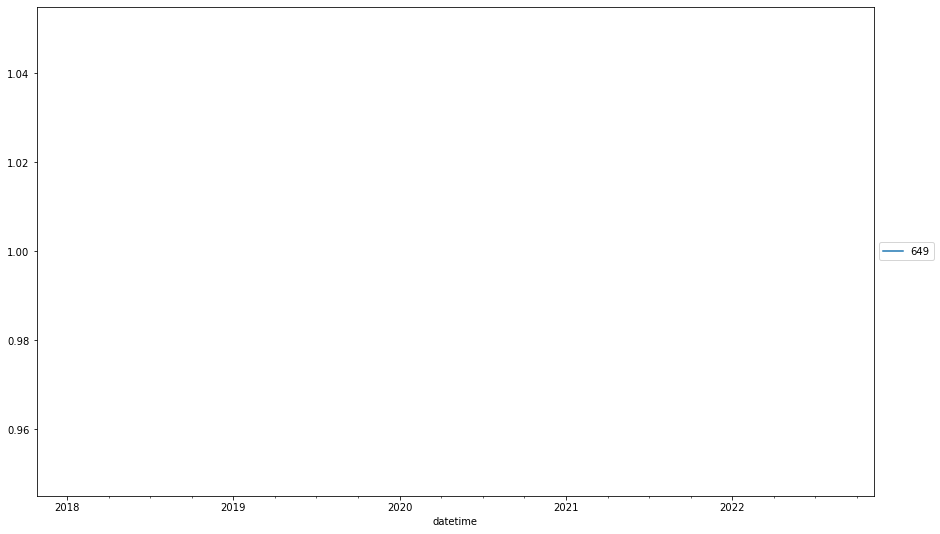

In [173]:
everglades.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [174]:
everglades

page_viewed user_id cohort_id             ip  year month  \
datetime                                                                       
2020-05-06 19:06:32           /     649         5  70.125.150.41  2020     5   

                    day hour    weekday        name  start_date    end_date  \
datetime                                                                      
2020-05-06 19:06:32   6   19  Wednesday  Everglades  2014-11-18  2015-02-24   

                     program_id  
datetime                         
2020-05-06 19:06:32           1

### Hyperion

In [175]:
hyperion = df[df.name == 'Hyperion']

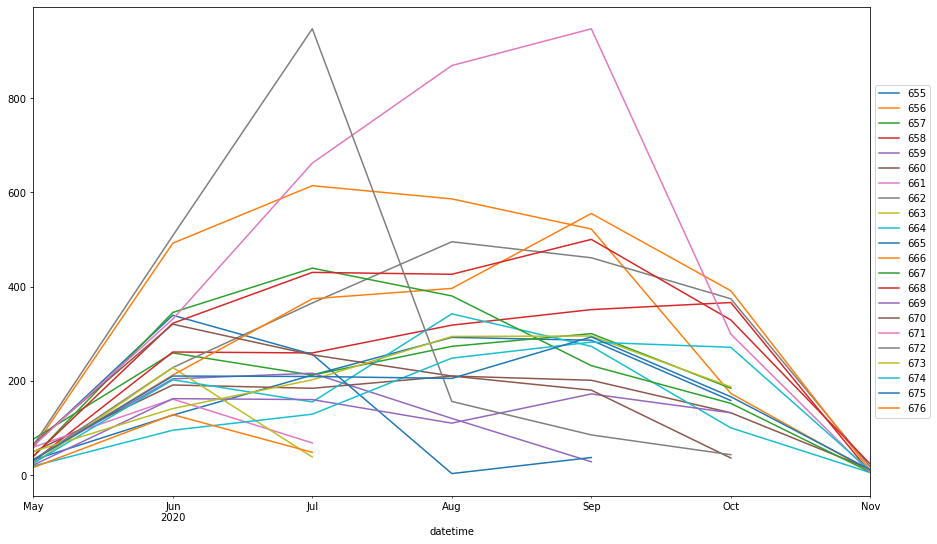

In [176]:
hyperion.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Darden 

In [177]:
darden = df[df.name == 'Darden']

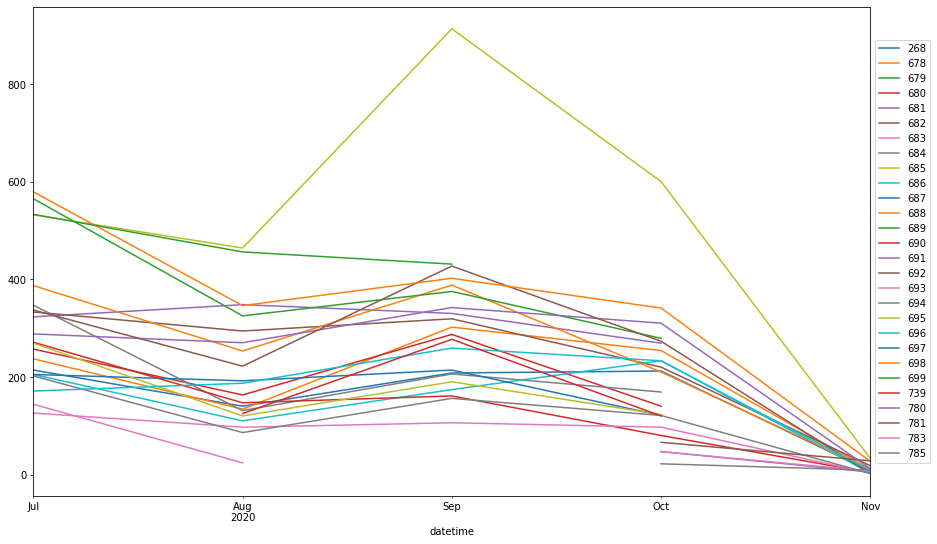

In [178]:
darden.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Bash 

In [179]:
bash = df[df.name == 'Bash']

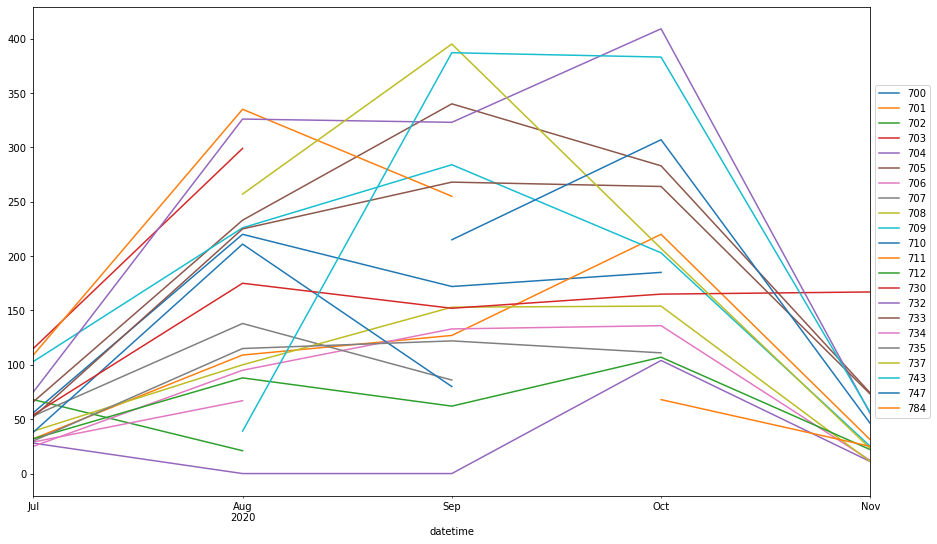

In [180]:
bash.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Jupiter


In [181]:
jupiter = df[df.name == 'Jupiter']

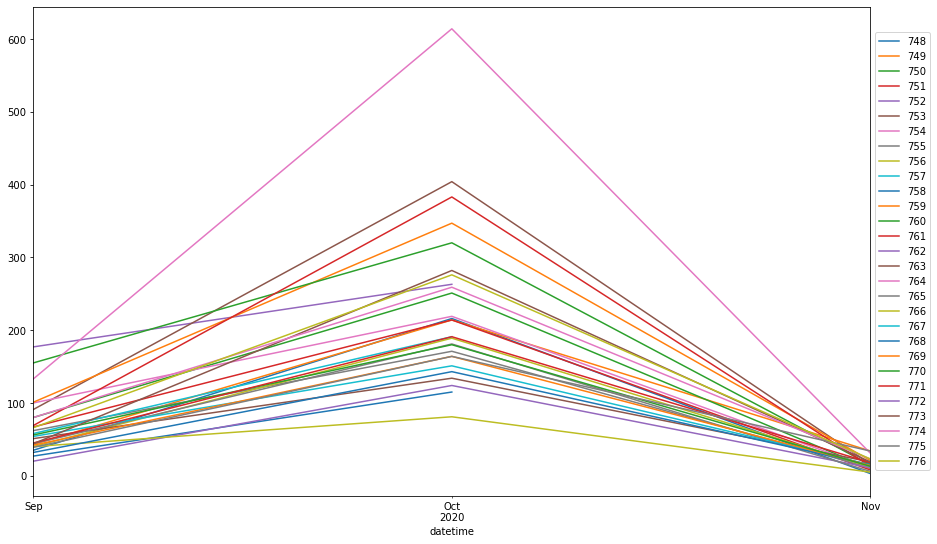

In [182]:
jupiter.groupby('user_id').resample('M').page_viewed.count().unstack(0).plot(figsize = (15,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()